<a href="./index.html">Return to homepage</a>

### Table of Contents:
[Discrete Distributions](#discrete-distributions)
* [Bernoulli Distribution](#bernoulli-distribution)
* [Binomial Distribution](#binomial-distribution)
* [Geometric Distribution](#geometric-distribution)
* [Negative Binomial Distribution](#negative-binomial-distribution)
* [Poisson Distribution](#poisson-distribution)

[Continuous Distributions](#continuous-distributions)
* [Normal Distribution](#normal-distribution)
* [Chi-squared-distribution](#Chi-squared-distribution)
* [Uniform Distribution](#uniform-distribution)
* [Exponential Distribution](#exponential-distribution)
* [Log-Normal Distribution](#lognormal-distribution)

[Statistical Tests for Determining Distribution](#test-distributions)
* [Quantile-Quantile Plots (QQ plots)](#qq-plot)

## Discrete Distributions <a name="discrete-distributions"></a>

### Bernoulli Distribution <a name="bernoulli-distribution"></a>
Bernoulli(p)
Binary, boolean output: 1 (success) with probability p, or 0 (failure) with probability q=1-p.
*  E[X] = p
*  Var(X) = p * q

Successes: 7028, Failures: 2972


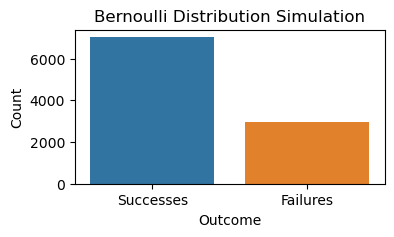

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

p = 0.7 # probability of getting a "success" (heads)
num_simulations = 10000

# generate random bernoulli distributed variables (0 or 1)
simulations = np.random.binomial(n=1, p=p, size=num_simulations)

# count the number of successes and failures
successes = np.count_nonzero(simulations == 1)
failures = np.count_nonzero(simulations == 0)
print(f'Successes: {successes}, Failures: {failures}')

plt.figure(figsize=(4, 2))
sns.barplot(x=['Successes', 'Failures'], y=[successes, failures], palette=['#1f77b4', '#ff7f0e'])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Bernoulli Distribution Simulation')
plt.show()

### Binomial Distribution <a name="binomial-distribution"></a>

Number of successful Bernoulli trials in a sequence.


Parameters:
  * n: # of successes in a sequence of independent experiments, each asking a yes–no question
  * p: probability  of success or failure q=1-p
  
Properties:
* E[Y] = n * p
* Var(Y) = n * p * q

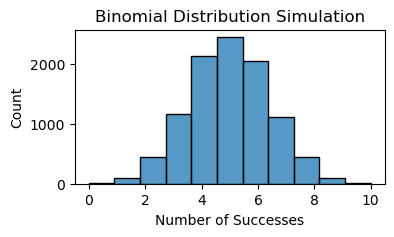

In [23]:
n = 10 # number of trials
p = 0.5 # probability of getting a "success" (heads)

# generate random binomial distributed variables
simulations = np.random.binomial(n=n, p=p, size=num_simulations)

plt.figure(figsize=(4, 2))
sns.histplot(simulations, bins=n+1, color='#1f77b4')
plt.xlabel('Number of Successes')
plt.ylabel('Count')
plt.title('Binomial Distribution Simulation')
plt.show()

### Geometric Distribution <a name="geometric-distribution"></a>
Number of Bernoulli trials until success.

Properties:
* $ E[X] = \frac{1}{p} $
* $ \text{Var}(X) = \frac{q}{p^2} $ 


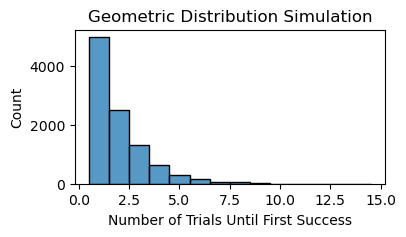

In [24]:
p = 0.5 # probability of getting a "success" (heads)

# generate random geometric distributed variables
simulations = np.random.geometric(p=p, size=num_simulations)

plt.figure(figsize=(4, 2))
sns.histplot(simulations, color='#1f77b4', discrete=True)
plt.xlabel('Number of Trials Until First Success')
plt.ylabel('Count')
plt.title('Geometric Distribution Simulation')
plt.show()

### Negative Binomial Distribution <a name="negative-binomial-distribution"></a>

sum of r Geom RV’s the time until the rth success. 

FFFSSFS = NegBin(3,p)=7 

$ f(y) = \binom{k + r - 1}{k} q^{y - r} p^r $, where $y = r, r + 1, \ldots$
* $ E[Y] = \frac{r}{p} $
* $ \text{Var}(X) = \frac{qr}{p^2} $

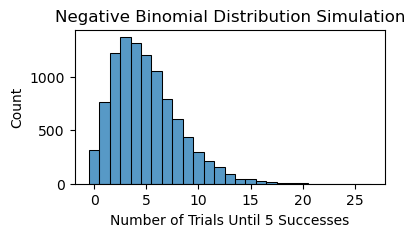

In [25]:
r = 5 # number of successes
p = 0.5 # probability of getting a "success" (heads)

# generate random negative binomial distributed variables
simulations = np.random.negative_binomial(n=r, p=p, size=num_simulations)

plt.figure(figsize=(4, 2))
sns.histplot(simulations, color='#1f77b4', discrete=True)
plt.xlabel('Number of Trials Until {} Successes'.format(r))
plt.ylabel('Count')
plt.title('Negative Binomial Distribution Simulation')
plt.show()

### Poisson Distribution <a name="poisson-distribution"></a>

Poisson($\lambda$)

$ f(x) = \frac{\lambda^x e^{-\lambda}}{x!} $

$ F(x) = e^{-\lambda} \sum_{i=0}^{x} \frac{\lambda^i}{i!} $

* $ E[X] = \lambda = \text{Var}(X) $

Eg. Pois(12), What is the prob of exactly 8?
   (use pmf) 128*e-12/8! =6.55%

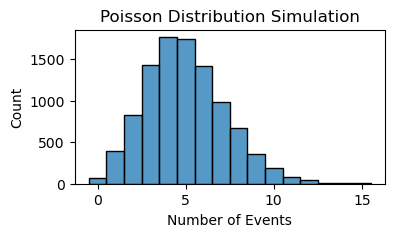

In [26]:
lam = 5 # lambda - average rate of success (events per interval)

# generate random Poisson distributed variables
simulations = np.random.poisson(lam=lam, size=num_simulations)

plt.figure(figsize=(4, 2))
sns.histplot(simulations, color='#1f77b4', discrete=True)
plt.xlabel('Number of Events')
plt.ylabel('Count')
plt.title('Poisson Distribution Simulation')
plt.show()

# Continuous Distributions <a name="continuous-distributions"></a>

### Normal Distribution <a name="normal-distribution"></a>

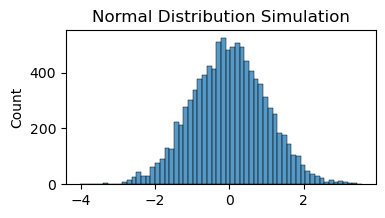

In [30]:
mu = 0 # mean
sigma = 1 # standard deviation

# generate random Normal distributed variables
simulations = np.random.normal(loc=mu, scale=sigma, size=num_simulations)

plt.figure(figsize=(4, 2))
sns.histplot(simulations, color='#1f77b4')
plt.ylabel('Count')
plt.title('Normal Distribution Simulation')
plt.show()

### Chi-squared distribution <a name="Chi-squared-distribution"></a>

Used primarily in hypothesis testing, and to a lesser extent for confidence intervals for population variance when the underlying distribution is normal. Not as often applied in the direct modeling of natural phenomena.


$ \chi^2 = \sum_{i=1}^{k} Z_i^2 $

Where $ Z_1^2, ..., Z_k^2 $ are standard normal random variables and $k$ is "degrees of freedom"

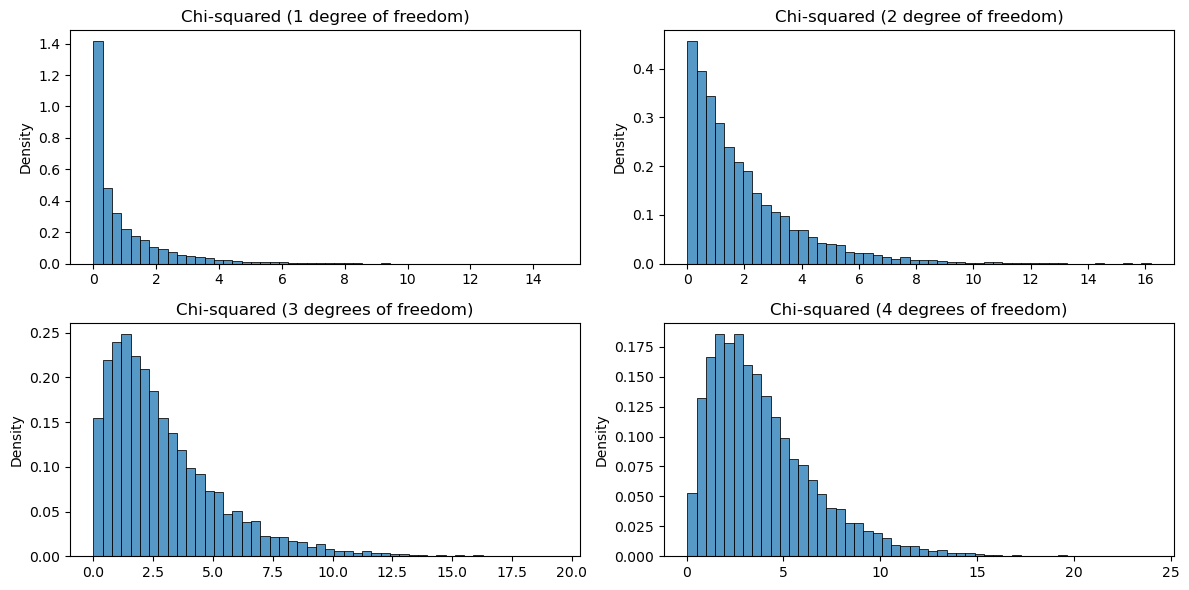

In [29]:
rng = np.random.default_rng()
Z_1 = rng.standard_normal(num_simulations)**2
Z_2 = rng.standard_normal(num_simulations)**2
Z_3 = rng.standard_normal(num_simulations)**2
Z_4 = rng.standard_normal(num_simulations)**2

plot_settings = {'bins': 50, 'color': '#1f77b4', 'stat': 'density'}
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
sns.histplot(Z_1, ax=axs[0, 0], **plot_settings)
axs[0, 0].set_title('Chi-squared (1 degree of freedom)')
sns.histplot(Z_1 + Z_2, ax=axs[0, 1], **plot_settings)
axs[0, 1].set_title('Chi-squared (2 degree of freedom)')
sns.histplot(Z_1 + Z_2 + Z_3, ax=axs[1, 0], **plot_settings)
axs[1, 0].set_title('Chi-squared (3 degrees of freedom)')
sns.histplot(Z_1 + Z_2 + Z_3 + Z_4, ax=axs[1, 1], **plot_settings)
axs[1, 1].set_title('Chi-squared (4 degrees of freedom)')
plt.tight_layout()
plt.show()

### Uniform Distribution <a name="uniform-distribution"></a>

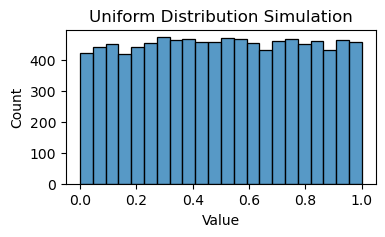

In [32]:
low = 0 # lower boundary of the output interval
high = 1 # upper boundary of the output interval

# generate random Uniform distributed variables
simulations = np.random.uniform(low=low, high=high, size=num_simulations)

plt.figure(figsize=(4, 2))
sns.histplot(simulations, color='#1f77b4')
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Uniform Distribution Simulation')
plt.show()

### Exponential Distribution <a name="exponential-distribution"></a>

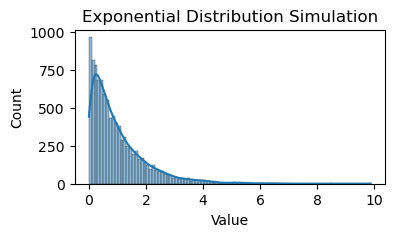

In [33]:
scale = 1 # scale parameter (1 / lambda)

# generate random Exponential distributed variables
simulations = np.random.exponential(scale=scale, size=num_simulations)

plt.figure(figsize=(4, 2))
sns.histplot(simulations, color='#1f77b4', kde=True)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Exponential Distribution Simulation')
plt.show()

### Log-Normal Distribution <a name="lognormal-distribution"></a>
Example: average call time at a call center 

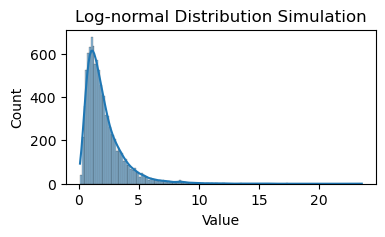

In [34]:
mu = 0.5  # mean
sigma = 0.7  # standard deviation

# Generate random Log-normal distributed variables
simulations = np.random.lognormal(mean=mu, sigma=sigma, size=num_simulations)

plt.figure(figsize=(4, 2))
sns.histplot(simulations, color='#1f77b4', kde=True)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Log-normal Distribution Simulation')
plt.show()

# Statistical Tests for Determining Distribution <a name="test-distributions"></a>
### Quantile-Quantile Plots (QQ plots) <a name="qq-plot"></a>
[StatQuest - Quantile-Quantile Plots (QQ plots), Clearly Explained!!!](https://www.youtube.com/watch?v=okjYjClSjOg)

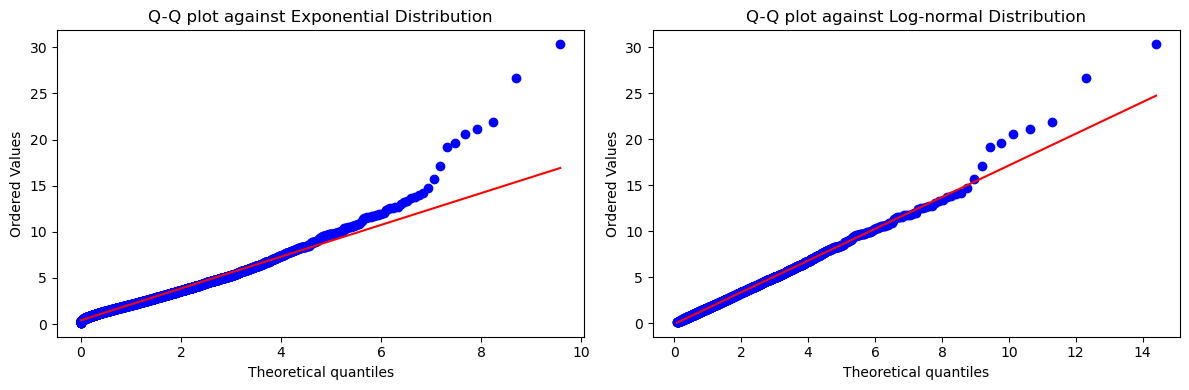

In [35]:
data = np.random.lognormal(mean=0.5, sigma=0.7, size=num_simulations)

# Set up a figure for side-by-side plots
plt.figure(figsize=(12, 4))

# Exponential Q-Q plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
stats.probplot(data, dist=stats.expon, plot=plt)
plt.title('Q-Q plot against Exponential Distribution')

# Log-normal Q-Q plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
stats.probplot(data, dist=stats.lognorm(s=0.7), plot=plt)
plt.title('Q-Q plot against Log-normal Distribution')

plt.tight_layout()  # Adjusts subplot params for better layout
plt.show()